In [1]:
from gurobipy import *
import networkx as nx
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from simulations import Test
from getf import GETF
from opt_solver_util import (make_assignment_visual, 
                              solver_results, 
                              init_solver,
                              get_makespan,
                            v_helper)

## Example 1

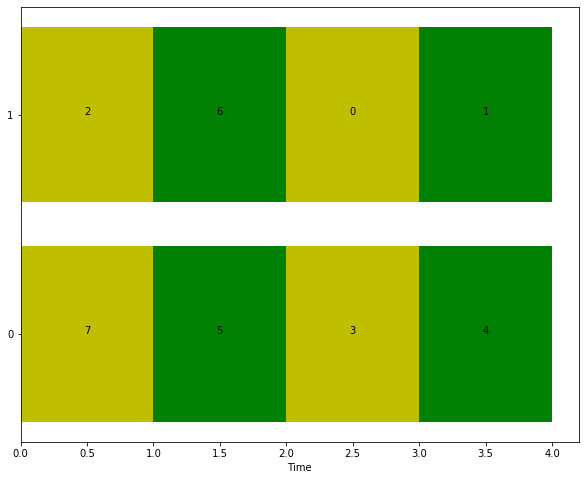

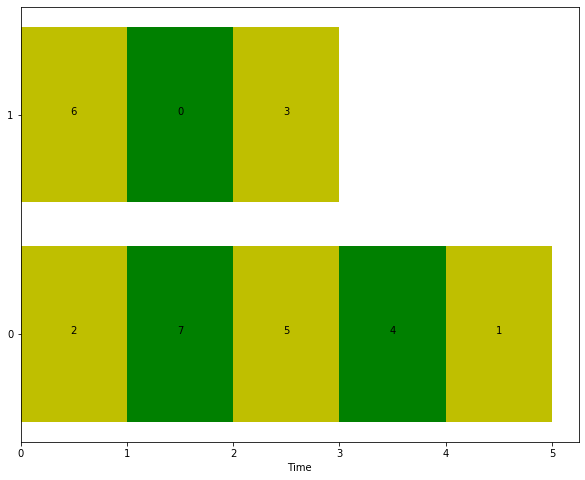

[[2, 7, 5, 4, 1], [6, 0, 3]]
[[1.0, 3.0], [4.0, 5.0], [0, 1.0], [3.0, 4.0], [3.0, 4.0], [2.0, 3.0], [0, 1.0], [1.0, 2.0]]


In [2]:
num_tasks = 8
num_machines = 2
task_units = [1 for _ in range(num_tasks)]
task_transfer_units = {(7, 5) : 1, (6, 4) : 1, (5, 4) : 1, (5, 3) : 1, (3, 1) : 1, (2, 1) : 1, (2, 0) : 1}
machine_speeds = [1 for _ in range(num_machines)]
machine_comm_bandwidths = [[-1 for _ in range(num_machines)] for _ in range(num_machines)]
tie_breaking_rule = 1


simulations = Test(task_units, task_transfer_units, machine_speeds, \
            machine_comm_bandwidths, tie_breaking_rule)

# print(simulations.machine_task_list)
# print(simulations.t)


getf = GETF(task_units, task_transfer_units, machine_speeds, \
            machine_comm_bandwidths, tie_breaking_rule, is_etf=True)

print(getf.machine_task_list)
print(getf.t)


Results
0 [1.4142135623]
1 [0.99999999992]
2 [2.0]
3 [1.4142135623]
4 [0.99999999992]
5 [1.7320508075]
6 [1.7320508075]
7 [2.0]
Objective: 24.585057479


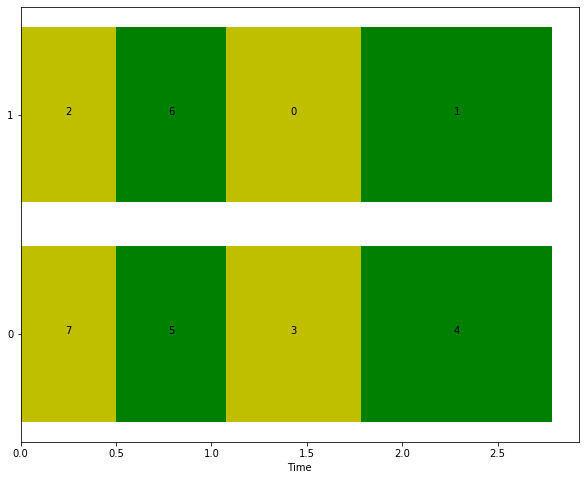

In [3]:
v = v_helper(num_tasks, simulations.machine_task_list, simulations.t)    
m, s, O = init_solver(v)

# Manually add constraints
# m.Equation(1 / s[1] == 1 / s[5]) 

s, task_process_time = solver_results(s, m, O, verbose=True)
t = [[None, None] for _ in range(len(v))]

make_assignment_visual(t, task_process_time, simulations.machine_task_list)

Results
0 [1.2367618562]
1 [1.0]
2 [2.3388929258]
3 [1.0]
4 [1.4142135624]
5 [1.8629063635]
6 [1.590465305]
7 [2.1143368035]
Objective: 25.11515363
[0.808563099667821, 1.0, 0.4275527062265827, 1.0, 0.707106781173095, 0.5367956326700261, 0.6287468182149375, 0.4729615444164972]


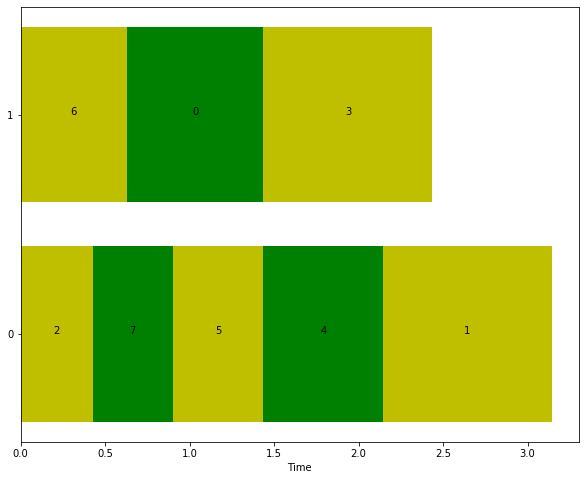

In [4]:
v = v_helper(num_tasks, getf.machine_task_list, getf.t)              
m, s, O = init_solver(v)
# Manually add constraints

m.Equation(1 / s[6] + 1 / s[0] >= 1 / s[2] + 1 / s[7] +  1 / s[5]) 

s, task_process_time = solver_results(s, m, O, verbose=True)
t = [[None, None] for _ in range(len(v))]
t[3][0] = sum(task_process_time[i] for i in [2, 7, 5])
print(task_process_time)

make_assignment_visual(t, task_process_time, getf.machine_task_list)

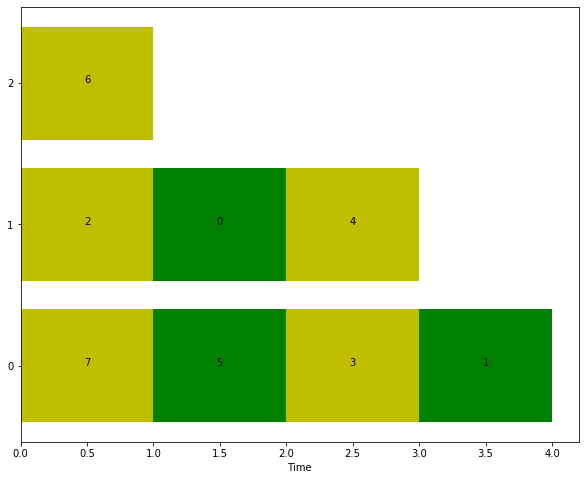

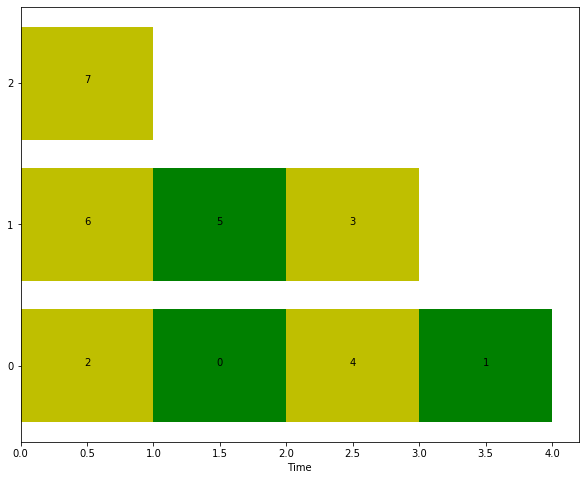

In [5]:
num_tasks = 8
num_machines = 3
task_units = [1 for _ in range(num_tasks)]
task_transfer_units = {(7, 5) : 1, (6, 4) : 1, (5, 4) : 1, (5, 3) : 1, (3, 1) : 1, (2, 1) : 1, (2, 0) : 1}
machine_speeds = [1 for _ in range(num_machines)]
machine_comm_bandwidths = [[-1 for _ in range(num_machines)] for _ in range(num_machines)]
tie_breaking_rule = 1


simulations = Test(task_units, task_transfer_units, machine_speeds, \
            machine_comm_bandwidths, tie_breaking_rule)

# print(simulations.machine_task_list)
# print(simulations.t)


getf = GETF(task_units, task_transfer_units, machine_speeds, \
            machine_comm_bandwidths, tie_breaking_rule, is_etf=True)

# print(getf.machine_task_list)
# print(getf.t)

Results
0 [1.4142135624]
1 [0.99999999999]
2 [1.7320508076]
3 [1.4142135624]
4 [0.99999999999]
5 [1.7320508076]
6 [0.99999999999]
7 [2.0]
Objective: 22.58505748


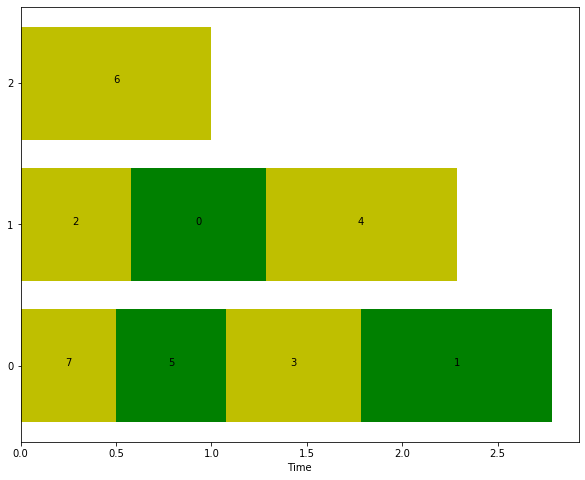

In [6]:
v = v_helper(num_tasks, simulations.machine_task_list, simulations.t)    
m, s, O = init_solver(v)

# Manually add constraints
# m.Equation(1 / s[1] == 1 / s[5]) 

s, task_process_time = solver_results(s, m, O, verbose=True)
t = [[None, None] for _ in range(len(v))]

make_assignment_visual(t, task_process_time, simulations.machine_task_list)

Results
0 [1.5811388361]
1 [1.0]
2 [1.8708286985]
3 [1.0]
4 [1.4142135624]
5 [1.5811388242]
6 [1.8708286884]
7 [1.0]
Objective: 22.636297214
[0.6324555296273517, 1.0, 0.5345224823639833, 1.0, 0.707106781173095, 0.6324555343873518, 0.5345224852496975, 1.0]


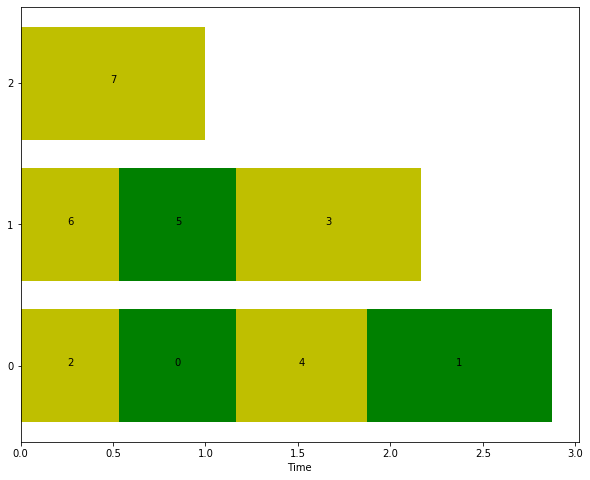

In [7]:
v = v_helper(num_tasks, getf.machine_task_list, getf.t)              
m, s, O = init_solver(v)
# Manually add constraints
m.Equation(1 / s[6] + 1 / s[5] <= 1 / s[2] + 1 / s[0]) 
#m.Equation(1/s[7]  1/s[5])
s, task_process_time = solver_results(s, m, O, verbose=True)
t = [[None, None] for _ in range(len(v))]
#t[3][0] = sum(task_process_time[i] for i in [2, 7, 5])
print(task_process_time)

make_assignment_visual(t, task_process_time, getf.machine_task_list)

## Example 2

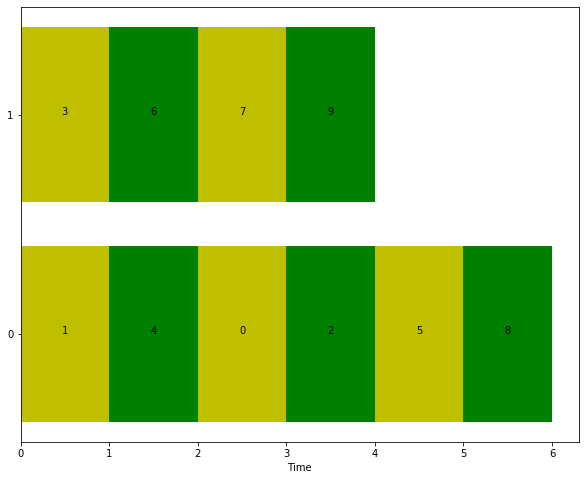

[[1, 4, 0, 2, 5, 8], [3, 6, 7, 9]]
[[2.0, 3.0], [0, 1.0], [3.0, 4.0], [0, 1.0], [1.0, 2.0], [4.0, 5.0], [1.0, 2.0], [2.0, 3.0], [5.0, 6.0], [3.0, 4.0]]


In [8]:
num_tasks = 10
num_machines = 2
task_units = [1 for _ in range(num_tasks)]
task_transfer_units = {(0, 2) : 1, (1, 4) : 1, (2, 5) : 1, (3, 6) : 1, (4, 7) : 1, (5,8) : 1, (6,9) : 1, (1,2) : 1, (3,2) : 1, (4,5) : 1, (6,5) : 1, (7,8) : 1}
machine_speeds = [1 for _ in range(num_machines)]
machine_comm_bandwidths = [[-1 for _ in range(num_machines)] for _ in range(num_machines)]
tie_breaking_rule = 1


simulations = Test(task_units, task_transfer_units, machine_speeds, \
            machine_comm_bandwidths, tie_breaking_rule)

print(simulations.machine_task_list)
print(simulations.t)

Results
0 [2.0]
1 [2.4494897427]
2 [1.7320508076]
3 [2.0]
4 [2.2360679774]
5 [1.4142135625]
6 [1.7320508076]
7 [1.4142135625]
8 [0.99999999976]
9 [0.99999999976]
Objective: 33.956172918


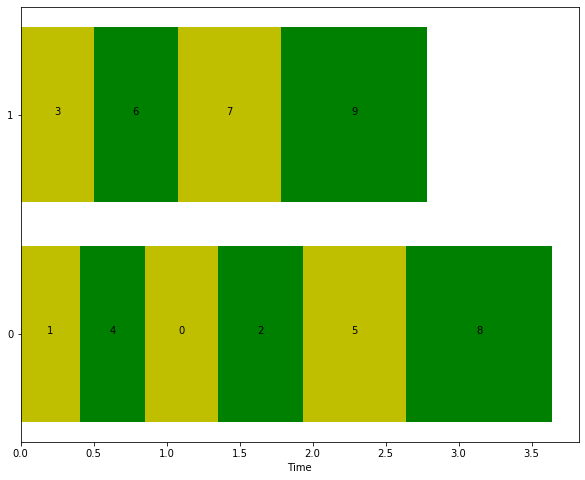

In [9]:
v = v_helper(num_tasks, simulations.machine_task_list, simulations.t)    
m, s, O = init_solver(v)

# Manually add constraints
# m.Equation(1 / s[1] == 1 / s[5]) 

s, task_process_time = solver_results(s, m, O, verbose=True)
t = [[None, None] for _ in range(len(v))]

make_assignment_visual(t, task_process_time, simulations.machine_task_list)

In [10]:
optimal = 2 * sum([2 * np.sqrt(i) for i in range(5)])
print(optimal)

24.58505747976789


In [11]:
print(33.956172918 / 24.58505747976789)

1.3811711827781572
